In [65]:
import pandas as pd
df = pd.read_excel('/content/Cleaned_DF.xlsx',parse_dates=True)
df.head()

,Log Date,site Name,Turbine Code,Cluster Name,Gen.Units,AVG WindSpd,WTG Fault,PM ShutDown,MMA,Grid Availability,...,COLORCODE2,STATUSMSG3,COLORCODE3,month_year,custom_sort,Total_Fault,days_in_month,error_count,month,year
0,2020-04-01,AgadGaon,TPCAG-01,1-Agadgaon,983,3.9,0.0,0.0,100.0,92.080002,...,NaN,NaN,NaN,Apr-2020,202004,0.0,30,0,4,2020
1,2020-04-01,AgadGaon,TPCAG-02,1-Agadgaon,813,3.8,0.0,0.0,100.0,92.080002,...,NaN,NaN,NaN,Apr-2020,202004,0.0,30,0,4,2020
2,2020-04-01,AgadGaon,TPCAG-03,1-Agadgaon,1368,4.2,0.0,0.0,100.0,92.849998,...,NaN,NaN,NaN,Apr-2020,202004,0.0,30,0,4,2020
3,2020-04-01,AgadGaon,TPCAG-04,1-Agadgaon,1406,4.1,0.0,0.0,100.0,92.849998,...,NaN,NaN,NaN,Apr-2020,202004,0.0,30,0,4,2020
4,2020-04-01,AgadGaon,TPCAG-05,1-Agadgaon,1754,3.8,0.0,0.0,100.0,100.000000,...,NaN,NaN,NaN,Apr-2020,202004,0.0,30,0,4,2020


In [66]:
new_df = df[['Log Date','Gen.Units',
       'AVG WindSpd', 'WTG Fault', 'PM ShutDown', 'MMA', 'Grid Availability',
       'Capacity Factor']]
new_df.head()

,Log Date,Gen.Units,AVG WindSpd,WTG Fault,PM ShutDown,MMA,Grid Availability,Capacity Factor
0,2020-04-01,983,3.9,0.0,0.0,100.0,92.080002,5.12
1,2020-04-01,813,3.8,0.0,0.0,100.0,92.080002,4.23
2,2020-04-01,1368,4.2,0.0,0.0,100.0,92.849998,7.13
3,2020-04-01,1406,4.1,0.0,0.0,100.0,92.849998,7.32
4,2020-04-01,1754,3.8,0.0,0.0,100.0,100.000000,9.14


In [67]:
# Group by 'Date' and aggregate
grouped_df = new_df.groupby('Log Date').agg({
    'Gen.Units': 'sum',       # Sum of Sales for each date
    'AVG WindSpd': 'mean',
    'WTG Fault': 'sum',
    'PM ShutDown': 'sum',
    'MMA': 'mean',
    'Grid Availability': 'mean',
    'Capacity Factor': 'mean'
    # Mean of Quantity for each date
}).reset_index()
grouped_df.head()

,Log Date,Gen.Units,AVG WindSpd,WTG Fault,PM ShutDown,MMA,Grid Availability,Capacity Factor
0,2020-04-01,107889,3.858730,0.350000,0.0,99.976825,98.692698,8.920159
1,2020-04-02,127978,4.425397,7.883333,0.0,99.478571,99.456825,10.580318
2,2020-04-03,137558,4.720635,6.283333,0.0,99.584603,100.000000,11.372540
3,2020-04-04,128363,4.417460,5.333333,0.0,99.647143,100.000000,10.612381
4,2020-04-05,184724,5.073016,4.600000,0.0,99.695873,94.865079,15.271429


In [68]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Log Date           1545 non-null   datetime64[ns]
 1   Gen.Units          1545 non-null   int64         
 2   AVG WindSpd        1545 non-null   float64       
 3   WTG Fault          1545 non-null   float64       
 4   PM ShutDown        1545 non-null   float64       
 5   MMA                1545 non-null   float64       
 6   Grid Availability  1545 non-null   float64       
 7   Capacity Factor    1545 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 96.7 KB


In [69]:
gen_df = grouped_df[['Log Date','Gen.Units','AVG WindSpd']]
gen_df.head()

,Log Date,Gen.Units,AVG WindSpd
0,2020-04-01,107889,3.858730
1,2020-04-02,127978,4.425397
2,2020-04-03,137558,4.720635
3,2020-04-04,128363,4.417460
4,2020-04-05,184724,5.073016


In [70]:
gen_df = gen_df.set_index('Log Date')
gen_df.head()

,Gen.Units,AVG WindSpd
Log Date,,
2020-04-01,107889,3.858730
2020-04-02,127978,4.425397
2020-04-03,137558,4.720635
2020-04-04,128363,4.417460
2020-04-05,184724,5.073016


In [71]:
# gen_df.plot()

In [72]:
#Testing for stationarity

from statsmodels.tsa.stattools import adfuller
result = adfuller(gen_df['Gen.Units'])

#H0: The data is non-stationary. (null hypothesis)
#H1: The data is stationary.  (alternate hypothesis)

def adfuller_test(data_column):
    result=adfuller(data_column)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
      print(label+' : '+str(value))

    if result[1] <= 0.05:
      print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
      print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(gen_df['Gen.Units'])

ADF Test Statistic : -8.205281624008213
p-value : 7.051885799739683e-13
#Lags Used : 5
Number of Observations Used : 1539
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

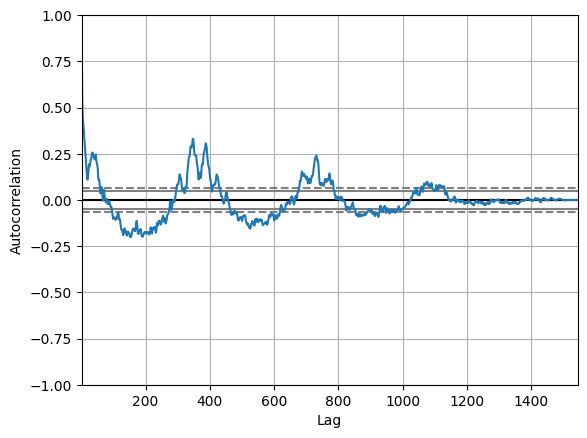

In [73]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(gen_df['Gen.Units'])

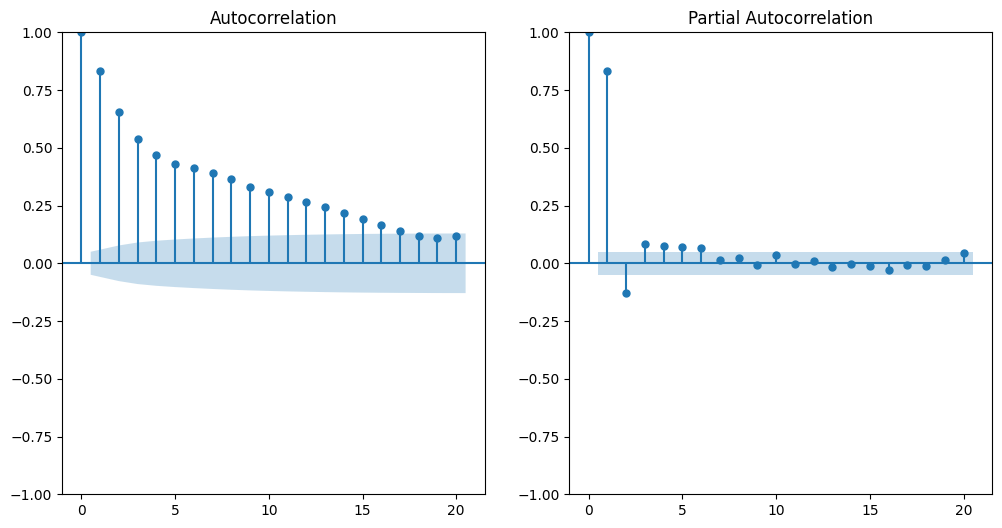

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
# ACF and PACF plots
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(gen_df['Gen.Units'], lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(gen_df['Gen.Units'], lags=20, ax=plt.gca())
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=8.57 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=42238.890, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=40405.337, Time=0.89 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=41296.127, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=43582.967, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=40405.614, Time=0.12 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=40396.460, Time=3.55 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=40397.632, Time=6.92 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=40407.229, Time=1.37 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=42196.784, Time=1.87 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=40372.225, Time=5.86 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=40381.076, Time=2.87 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=40373.145, Time=7.32 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=40382.963, Time=2.39 sec
 ARIMA(3,0,

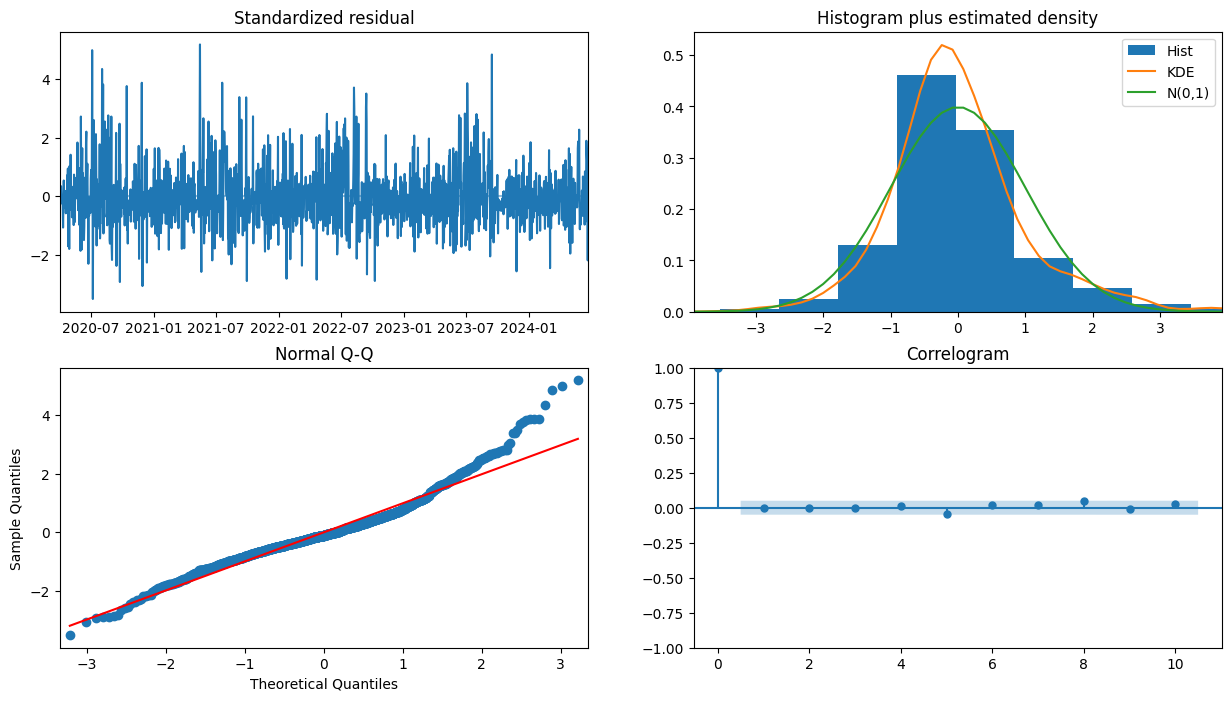

In [75]:
#Using pmdarima library to find out p, d & q
!pip install pmdarima
import pmdarima as pm
series = gen_df['Gen.Units']

# Fit the auto_arima model
model = pm.auto_arima(series,
                      seasonal=True, # Change to True if your data has a seasonal component
                      m=12, # Number of months in a year
                      stepwise=True,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True
                      )

# Print the model summary
print(model.summary())

# Plot diagnostics
model.plot_diagnostics(figsize=(15, 8))
plt.show()


In [76]:
# gen_df.shape

In [77]:
train = gen_df.iloc[:-50]
test = gen_df.iloc[-50:]
print(train.shape,test.shape)

(1495, 2) (50, 2)


In [78]:
# from statsmodels.tsa.arima.model import ARIMA
# model1 = ARIMA(train['Gen.Units'], order=(2, 0, 2))
# model_fit = model1.fit()
# model_fit.summary()

In [79]:
# #making predictions on test set
# start = len(train)
# end = len(train) + len(test) - 1
# predictions = model_fit.predict(start =start, end= end,typ='levels')
# predictions

In [80]:
# predictions.plot(legend=True)
# test['Gen.Units'].plot(legend=True)

In [81]:
# test['Gen.Units'].mean()

In [82]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# rmse = sqrt(mean_squared_error(test['Gen.Units'], predictions))
# print(rmse)

In [83]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train['Gen.Units'],
                                  order=(5,0,0),
                                  seasonal_order=(2,0,0,12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False,
                                  exog=train['AVG WindSpd'])

model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Gen.Units   No. Observations:                 1495
Model:             SARIMAX(5, 0, 0)x(2, 0, 0, 12)   Log Likelihood              -18494.231
Date:                            Wed, 10 Jul 2024   AIC                          37006.462
Time:                                    12:46:08   BIC                          37054.074
Sample:                                04-01-2020   HQIC                         37024.219
                                     - 05-04-2024                                         
Covariance Type:                              opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
AVG WindSpd  5.287e+04    933.294     56.652      0.000     5.1e+04    5.47e+04
ar.L1           0.8541      0.020     43.535      0.000       0.816       0.893
ar.L2          -0.0908      0.027     -3.330      0.001      -0.144      -0.037
ar.L3          -0.0164      0.030     -0.550      0.582      -0.075       0.042
ar.L4           0.0154      0.029      0.531      0.595      -0.041       0.072
ar.L5           0.0902      0.022      4.191      0.000       0.048       0.132
ar.S.L12        0.0394      0.025      1.554      0.120      -0.010       0.089
ar.S.L24        0.0901      0.021      4.337      0.000       0.049       0.131
sigma2       5.306e+09      0.005   1.04e+12      0.000    5.31e+09    5.31e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):              1019.42
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.57e+26. Standard errors may be unstable.
"""

In [87]:
#making predictions on test set
# Forecast on test data
n_periods = len(test)
forecast = model_fit.get_forecast(steps=n_periods, exog=test['AVG WindSpd'])
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

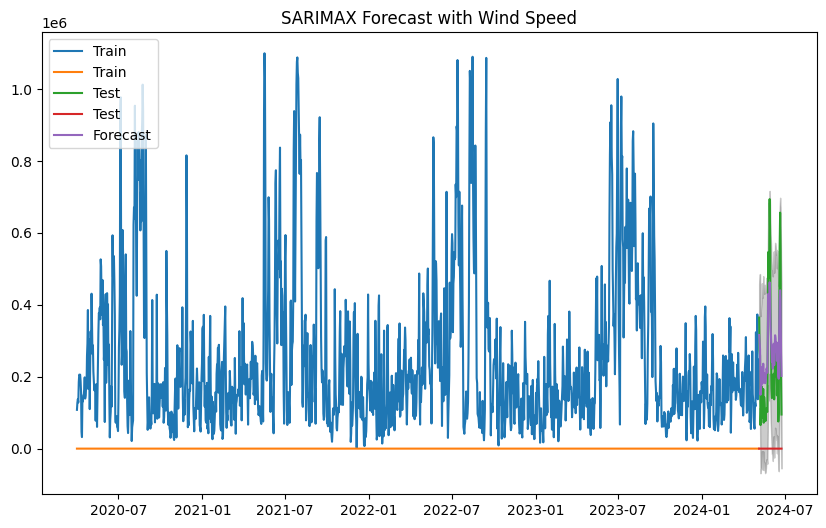

In [89]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_mean, label='Forecast')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='k', alpha=0.2)
plt.title('SARIMAX Forecast with Wind Speed')
plt.legend(loc='upper left')
plt.show()

In [90]:
# Calculate MSE
mse = ((forecast_mean - test) ** 2).mean()
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 2024-05-05 00:00:00   NaN
2024-05-06 00:00:00   NaN
2024-05-07 00:00:00   NaN
2024-05-08 00:00:00   NaN
2024-05-09 00:00:00   NaN
2024-05-10 00:00:00   NaN
2024-05-11 00:00:00   NaN
2024-05-12 00:00:00   NaN
2024-05-13 00:00:00   NaN
2024-05-14 00:00:00   NaN
2024-05-15 00:00:00   NaN
2024-05-16 00:00:00   NaN
2024-05-17 00:00:00   NaN
2024-05-18 00:00:00   NaN
2024-05-19 00:00:00   NaN
2024-05-20 00:00:00   NaN
2024-05-21 00:00:00   NaN
2024-05-22 00:00:00   NaN
2024-05-23 00:00:00   NaN
2024-05-24 00:00:00   NaN
2024-05-25 00:00:00   NaN
2024-05-26 00:00:00   NaN
2024-05-27 00:00:00   NaN
2024-05-28 00:00:00   NaN
2024-05-29 00:00:00   NaN
2024-05-30 00:00:00   NaN
2024-05-31 00:00:00   NaN
2024-06-01 00:00:00   NaN
2024-06-02 00:00:00   NaN
2024-06-03 00:00:00   NaN
2024-06-04 00:00:00   NaN
2024-06-05 00:00:00   NaN
2024-06-06 00:00:00   NaN
2024-06-07 00:00:00   NaN
2024-06-08 00:00:00   NaN
2024-06-09 00:00:00   NaN
2024-06-10 00:00:00   NaN
2024-06-11 00:00:0